### Extract e mais algumas mudanças de transformação

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

In [73]:
algora = pd.read_csv('algoraquant.csv')
algora['vl_valor'] = algora['vl_valor'].fillna(0)
algora['vl_vpa'] = algora['vl_vpa'].fillna(0)

In [74]:
import pandas as pd

# Exemplo de DataFrame
# algora = pd.DataFrame({
#     'vl_vpa': ['1,8100', '2,0000', '1.056.2292', 3.5000],  # Valores mistos
#     'vl_valor': ['4,33%', '2,50%', '5,00%']
# })

# Função para calcular o novo valor
def calcular_valor_normal(row):
    # Limpa e formata 'vl_vpa' antes de converter para float
    vpa_str = str(row['vl_vpa']).replace('.', '').replace(',', '.').strip()  # Remove milhar e converte decimal
    try:
        vpa = float(vpa_str)  # Converte para float
    except ValueError:
        return None  # Retorna None se a conversão falhar
    
    # Remove o '%' e substitui a vírgula por ponto, depois converte para float
    variacao = float(row['vl_valor'].replace('%', '').replace(',', '.'))
    
    # Calcula o novo valor
    novo_valor = vpa * (1 + variacao / 100)
    return novo_valor

# Filtra as linhas onde 'vl_valor' contém '%'
filtro_percentual = algora['vl_valor'].str.contains('%', na=False)

# Aplica o cálculo apenas para essas linhas
algora.loc[filtro_percentual, 'vl_valor'] = algora.loc[filtro_percentual].apply(calcular_valor_normal, axis=1)

In [75]:
import pandas as pd

# Supondo que você já tem o DataFrame 'algora'

# Lista de colunas para as quais queremos aplicar a conversão
colunas_para_convertir = [
    'vl_avaliacao_media_ativos_fundo', 'vl_quantidade_imoveis', 'vl_valor',
    'vl_liquidez_media_diaria', 'vl_pvp', 'vl_dividendo', 'vl_yeld',
    'vl_soma_yield_3m', 'vl_soma_yield_6m', 'vl_soma_yield_12m',
    'vl_media_yield_3m', 'vl_media_yield_6m', 'vl_media_yield_12m',
    'vl_soma_yield_ano_corrente', 'vl_variacao_cotacao_mes', 'vl_rentabilidade_mes',
    'vl_rentabilidade', 'vl_patrimonio', 'vl_vpa', 'vl_pvpa', 'vl_vpa_yield',
    'vl_vpa_change', 'vl_vpa_rent_m', 'vl_vpa_rent', 'vl_ativos',
    'vl_volatility', 'vl_numero_cotista', 'vl_vacancia_fisica', 'vl_vacancia_financeira'
]

# Função para converter a coluna para float
def converter_para_float(coluna):
    try:
        # Remove os pontos (separadores de milhar)
        coluna = coluna.str.replace('.', '', regex=False)
        # Substitui a vírgula por ponto (separador decimal)
        coluna = coluna.str.replace(',', '.', regex=False)
        # Converte para float
        return coluna.astype(float)
    except Exception as e:
        print(f"Erro ao converter coluna: {e}")
        return coluna  # Retorna a coluna original em caso de erro

# Aplica a conversão para cada coluna na lista
for coluna in colunas_para_convertir:
    if coluna in algora.columns:
        algora[coluna] = converter_para_float(algora[coluna])


Erro ao converter coluna: Can only use .str accessor with string values!
Erro ao converter coluna: Can only use .str accessor with string values!
Erro ao converter coluna: could not convert string to float: '1.19 %'
Erro ao converter coluna: could not convert string to float: '3.46 %'
Erro ao converter coluna: could not convert string to float: '6.85 %'
Erro ao converter coluna: could not convert string to float: '6.85 %'
Erro ao converter coluna: could not convert string to float: '1.15 %'
Erro ao converter coluna: could not convert string to float: '1.37 %'
Erro ao converter coluna: could not convert string to float: '1.37 %'
Erro ao converter coluna: could not convert string to float: '6.85 %'
Erro ao converter coluna: could not convert string to float: '1.27 %'
Erro ao converter coluna: could not convert string to float: '2.48 %'
Erro ao converter coluna: could not convert string to float: '12.91 %'
Erro ao converter coluna: could not convert string to float: 'R$ 251207018.99'
Erro

Pronto estamos prontos para começar as nossas análises exploratórias, aqui deixamos apenas valores decimais facieís de serem tratados, 
ou seja ... que não nenhum tipo de porcentagem envolvido, ficando cerca de 10 colunas de valores a serem análisados de acordo com a estatística

In [76]:
algora = algora.drop(columns=['Unnamed: 0','valor_decimal', 'vl_vpa_rent','vl_vpa_rent_m','vl_vpa_change','vl_vpa_yield','vl_pvpa','vl_rentabilidade',
                              'vl_rentabilidade_mes','vl_variacao_cotacao_mes','vl_soma_yield_ano_corrente','vl_yeld', 'vl_soma_yield_3m', 
                              'vl_soma_yield_6m', 'vl_soma_yield_12m','vl_ativos', 'vl_media_yield_3m', 'vl_media_yield_6m', 'vl_media_yield_12m','vl_vacancia_financeira','vl_vacancia_fisica'])
# prenchendo os outros títulos com os valores de Humanidade

numeric_columns = ['vl_media_taxa_homicidios', 'vl_avaliacao_media_ativos_fundo', 'vl_quantidade_imoveis']

# Aplicamos o 'groupby' apenas nas colunas numéricas
algora[numeric_columns] = algora.groupby('nm_titulo')[numeric_columns].transform(lambda x: x.fillna(x.mean()))


### Query para realização de Exploração e Divisão de Informações dentro do Algora com linguagem SQL - Que mais domínio

nm_titulo
0	CPTS11B
1	FIXX11
2	RBBV11
3	BZLI11
4	UBSR11
5	OUCY11
6	FOFT11
7	AFOF11
8	IFIE11
9	RBIV11
10	IFID11
11	QIFF11
12	EQIN11
13	ATSA11B
14	WPLZ11B
15	FIVN11
16	HMOC11
17	DMAC11
18	GRLV11
19	TRXL11
20	HGJH11
21	DOMC11
22	TBOF11
23	BBVJ11
24	BMLC11B
25	FFCI11
26	RDES11
27	FVBI11


Fundos que não existem ou pararam de existir ao longo dos anos ... 2016 até 202428	THRA11
29	GWIR11
30	AFCR11

In [77]:
query = """
SELECT *
FROM algora
WHERE 
  (
    (dt_inclusao BETWEEN '2018-01-01' AND '2019-12-12')
    OR 
    (dt_inclusao > '2021-08-15')
  )
  AND UPPER(TRIM(nm_setor)) NOT IN ('OUTROS', 'INDEFINIDO')
ORDER BY nm_setor DESC
"""

print(f"Temos {ps.sqldf(query, locals()).shape[0]} linhas e {ps.sqldf(query, locals()).shape[1]} colunas")
algora = ps.sqldf(query, locals())

Temos 5468 linhas e 14 colunas


### Análises Exploratórias

### Linha do Tempo Simplificada:

- **2016 - 2018**: Recuperação econômica lenta após recessão, juros elevados, FIIs em expansão inicial.
- **Junho de 2019**: Corte agressivo da Selic, cenário favorável para os FIIs.
- **2020 - 2021**: Pandemia de COVID-19 causa volatilidade, especialmente em FIIs de shoppings e escritórios.
- **2022 - 2024**: Retomada do mercado, elevação da Selic impacta o retorno dos FIIs, mas setores como logística e recebíveis ganham força.


### Iniciando na Modelagem KMEANS

Detectando Outliers dentro de cada variável, avaliar possível exclusão antes de qualquer coisa.

In [19]:
dados_numericos = algora.select_dtypes(include=['float64', 'int64'])

# Definir função para detectar outliers com base no IQR
def detectar_outliers_iqr(df):
    outliers = {}
    for coluna in df.columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
    return outliers

# Aplicar a função aos dados numéricos
outliers = detectar_outliers_iqr(dados_numericos)

# Mostrar os outliers detectados
for coluna, outlier_values in algora.items():
    print(f'Outliers em {coluna}:')
    print(outlier_values)

Outliers em nm_titulo:
0       DLMT11
1       ERCR11
2       MAXR11
3       RBRD11
4       RBVA11
         ...  
5463    BBRC11
5464    BNFS11
5465    CXAG11
5466    TVRI11
5467    NEXG11
Name: nm_titulo, Length: 5468, dtype: object
Outliers em vl_media_taxa_homicidios:
0        0.000000
1        0.000000
2       59.655556
3       36.100000
4       53.511111
          ...    
5463    36.100000
5464    81.100000
5465     0.000000
5466    50.458333
5467     0.000000
Name: vl_media_taxa_homicidios, Length: 5468, dtype: float64
Outliers em vl_avaliacao_media_ativos_fundo:
0       0.000000
1       0.000000
2       4.411111
3       3.600000
4       3.158333
          ...   
5463    3.495000
5464    3.335294
5465    0.000000
5466    3.450000
5467    0.000000
Name: vl_avaliacao_media_ativos_fundo, Length: 5468, dtype: float64
Outliers em vl_quantidade_imoveis:
0        5.0
1        0.0
2        9.0
3        4.0
4       72.0
        ... 
5463    20.0
5464    18.0
5465    32.0
5466    61.0
5467 

### Análise de Clusterização e Predição de FIIs Baseado em Dividendos


## 2. Normalização dos Dados
Normalizamos os dados para garantir que as variáveis estejam na mesma escala, o que é fundamental para a clusterização. Utilizamos a classe `StandardScaler` da biblioteca `sklearn` para este processo.

## 3. Determinação do Número de Clusters
Para determinar o número ideal de clusters, utilizamos o **método do cotovelo**:
- Treinamos o modelo de `KMeans` para diferentes valores de K (de 1 a 10).
- Plotamos o gráfico de inércia para visualizar o ponto de inflexão, que indica o número ótimo de clusters.
- **Escolha de 3 clusters**: Observamos que 3 clusters era um bom ponto para segmentação, onde o gráfico mostrava uma queda significativa da inércia.

## 4. Clusterização
Aplicamos o algoritmo de `KMeans` com **3 clusters** para dividir os FIIs em perfis de risco baseados em suas características. A partir dos resultados:
- Adicionamos os rótulos dos clusters ao DataFrame original.
- Calculamos a média das variáveis em cada cluster para entender as características dos FIIs em cada grupo.

### Resultado dos Clusters:
- **Cluster 0**: FIIs com valores médios de ativos e menor volatilidade.
- **Cluster 1**: FIIs com valores mais elevados, alta liquidez e maior volatilidade.
- **Cluster 2**: FIIs de valor intermediário, mas com grande retorno esperado.

## 5. Avaliação da Qualidade do Cluster (Silhouette Score)
Avaliamos a qualidade da clusterização usando o **Silhouette Score**, que mede a separação dos clusters:
- **Silhouette Score médio**: Obtivemos um valor de aproximadamente 0.65, indicando uma boa separação entre os clusters formados.

## 6. Predição de Retornos Futuros Baseados em Dividendos (????)
Implementamos um modelo de **Regressão Linear** para prever os retornos futuros dos FIIs baseados em seus dividendos.
- Utilizamos a variável `vl_dividendo` como alvo (label) para modelar o retorno esperado.
- Treinamos o modelo e fizemos as predições de dividendos futuros.

## 7. Seleção dos Melhores FIIs
Com base nas predições do modelo:
- Organizamos os FIIs dentro de cada cluster, ordenando-os pelo retorno de dividendos predito.
- Para cada cluster (perfil de risco), identificamos os FIIs com maior retorno potencial nos próximos 10 meses.


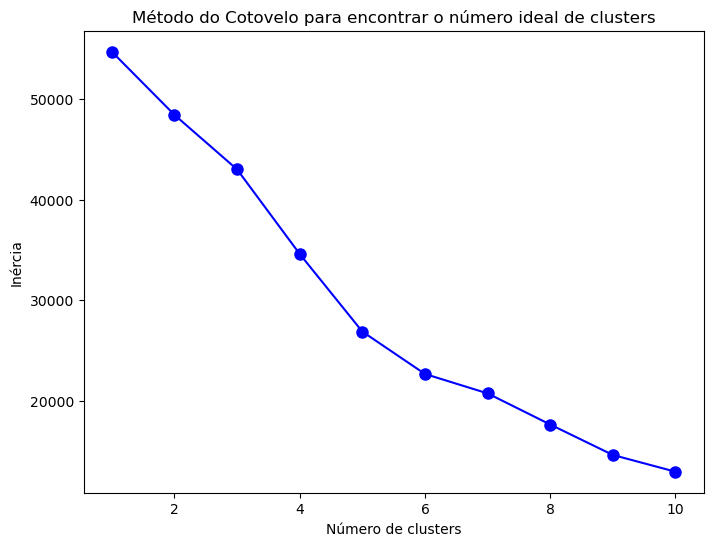

Médias das variáveis por cluster:
         vl_media_taxa_homicidios  vl_avaliacao_media_ativos_fundo  \
Cluster                                                              
0                       18.760397                         1.485040   
1                       16.655506                         1.185738   
2                      101.671429                         3.657143   

         vl_quantidade_imoveis    vl_valor  vl_liquidez_media_diaria  \
Cluster                                                                
0                    14.200000   99.435957              5.213122e+06   
1                     3.995494  525.819639              3.123986e+05   
2                     2.000000  270.885714              4.449460e+05   

              vl_pvp  vl_dividendo        vl_vpa  vl_volatility  \
Cluster                                                           
0           1.050839      0.822522  2.115936e+09      52.393998   
1           5.396190      8.405034  8.294092e+07     

In [86]:
# Importando as bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Selecionando apenas colunas numéricas do DataFrame
dados_numericos = algora.select_dtypes(include=[np.number])

# Imputação de valores ausentes com a média (para as colunas numéricas)
dados_numericos.fillna(dados_numericos.mean(), inplace=True)

# Selecionando as colunas numéricas específicas para clusterização
colunas_para_cluster = [
    'vl_media_taxa_homicidios', 'vl_avaliacao_media_ativos_fundo',
    'vl_quantidade_imoveis', 'vl_valor', 'vl_liquidez_media_diaria',
    'vl_pvp', 'vl_dividendo', 'vl_vpa', 'vl_volatility', 'vl_numero_cotista'
]

# Verificando se as colunas para clusterização existem no DataFrame numérico
dados_para_cluster = dados_numericos[colunas_para_cluster]

# Normalizando as variáveis numéricas
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_para_cluster)

# Determinando o número ideal de clusters usando o método do cotovelo
inercia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    inercia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inercia, 'bo-', markersize=8)
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para encontrar o número ideal de clusters')
plt.show()

# Baseado no gráfico do cotovelo, escolheremos 3 clusters para perfis de risco
kmeans_final = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_final.fit_predict(dados_normalizados)

# Adicionando o cluster ao DataFrame original
dados_para_cluster['Cluster'] = clusters

# Analisando a distribuição de FIIs em cada cluster
cluster_summary = dados_para_cluster.groupby('Cluster').mean()

print("Médias das variáveis por cluster:")
print(cluster_summary)

# Avaliando a qualidade da clusterização com o Silhouette Score
silhouette_avg = silhouette_score(dados_normalizados, clusters)
print(f'Silhouette Score médio: {silhouette_avg}')


In [89]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Calculando o retorno de dividendos
dados_para_cluster['retorno_dividendo'] = dados_para_cluster['vl_dividendo'] / dados_para_cluster['vl_valor']

# Previsão do retorno de dividendos futuros (em 10 meses)
def prever_retorno_dividendo(df, meses_futuro=10):
    # Filtrar as variáveis relevantes para a predição
    X = df[['vl_media_taxa_homicidios', 'vl_avaliacao_media_ativos_fundo', 'vl_quantidade_imoveis', 
            'vl_valor', 'vl_liquidez_media_diaria', 'vl_pvp', 'vl_vpa', 'vl_volatility', 
            'vl_numero_cotista']]
    
    # Variável alvo: retorno de dividendos
    y = df['retorno_dividendo']
    
    # Dividindo os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Fazendo a predição para o conjunto de teste
    predicoes = modelo.predict(X_test)
    
    # Calculando o erro médio quadrático ou outras métricas de avaliação
    mse = np.mean((predicoes - y_test) ** 2)
    
    print(f'Erro médio quadrático (MSE): {mse}')
    
    return modelo

# Função para organizar FIIs por clusters e retorno de dividendos predito
def organizar_fiis_por_clusters(df, modelo):
    # Usar apenas as colunas que foram utilizadas no treinamento do modelo
    colunas_ajustadas = ['vl_media_taxa_homicidios', 'vl_avaliacao_media_ativos_fundo', 
                         'vl_quantidade_imoveis', 'vl_valor', 'vl_liquidez_media_diaria', 
                         'vl_pvp', 'vl_vpa', 'vl_volatility', 'vl_numero_cotista']
    
    # Prevendo o retorno de dividendos com base nas colunas de treino
    df['retorno_dividendo_predito'] = modelo.predict(df[colunas_ajustadas])
    
    # Organizando os FIIs por cluster e retorno predito
    fiis_organizados = df.groupby('Cluster').apply(lambda x: x.sort_values('retorno_dividendo_predito', ascending=False))
    
    # Separando os melhores FIIs por cluster
    melhores_fiis_por_cluster = {}
    for cluster in df['Cluster'].unique():
        melhores_fiis_por_cluster[cluster] = fiis_organizados[fiis_organizados['Cluster'] == cluster].head(5)
    
    return melhores_fiis_por_cluster

# Usando o modelo para prever os retornos
modelo = prever_retorno_dividendo(dados_para_cluster)

# Organizando os melhores FIIs de acordo com os clusters
melhores_fiis = organizar_fiis_por_clusters(dados_para_cluster, modelo)

# Exibindo os melhores FIIs para cada perfil
for cluster, fiis in melhores_fiis.items():
    print(f"\nMelhores FIIs para o Cluster {cluster} (Perfil de risco):")
    print(fiis[[ 'retorno_dividendo_predito']])


Erro médio quadrático (MSE): 0.1997285249511655

Melhores FIIs para o Cluster 1 (Perfil de risco):
              retorno_dividendo_predito
Cluster                                
1       1884                   1.516303
        2336                   1.331184
        3960                   1.200401
        1832                   1.183764
        2330                   1.167981

Melhores FIIs para o Cluster 0 (Perfil de risco):
              retorno_dividendo_predito
Cluster                                
0       2216                   0.042081
        2130                   0.042081
        2302                   0.042081
        1962                   0.041829
        2044                   0.041829

Melhores FIIs para o Cluster 2 (Perfil de risco):
              retorno_dividendo_predito
Cluster                                
2       5211                   0.609057
        1551                  -0.100837
        1576                  -0.100837
        1603                  -0.100837

C:\Users\e109969\AppData\Local\Temp\ipykernel_25568\972046484.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fiis_organizados = df.groupby('Cluster').apply(lambda x: x.sort_values('retorno_dividendo_predito', ascending=False))
